# FEATURE ENGINEERING
# FEATURE EXTRACTCION
# PCA ON MNIST DATASET

In [214]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# This will download the MNIST dataset (might take a minute on first run)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# The data and labels are now in these variables
images, labels = mnist['data'], mnist['target']

# Convert string labels to integers
labels = labels.astype(int)

print(f"Images shape: {images.shape}") # Should be (70000, 784)
print(f"Labels shape: {labels.shape}") # Should be (70000,)


Images shape: (70000, 784)
Labels shape: (70000,)


In [278]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [279]:
df = pd.DataFrame(images)
result = pd.DataFrame(labels)

In [280]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
result.sample(8)

,0
29764,4
819,7
45764,3
58939,5
49006,3
58876,1
21175,7
56161,0


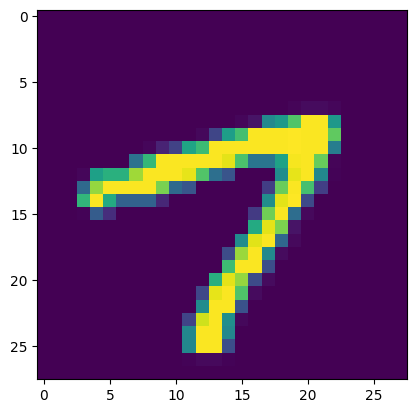

In [282]:
plt.imshow(df.iloc[101].values.reshape(28,28))

 RUNNING A ML MODEL BEFORE PCA

In [283]:
X = df
Y = result

In [284]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [285]:
x_train.shape

(56000, 784)

In [286]:
y_train.shape

(56000, 1)

In [224]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
knn = KNeighborsClassifier()

In [226]:
knn.fit(x_train,y_train)

c:\Users\HASEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [227]:
y_pred = knn.predict(x_test)

In [228]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9700714285714286

# NOW USING PCA

In [229]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [230]:
x_train = scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

In [231]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2) # components are by our desire



In [232]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [233]:
x_train.shape

(56000, 2)

In [234]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
knn.fit(x_train,y_train)

c:\Users\HASEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [236]:
y_pred = knn.predict(x_test)


In [237]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.32107142857142856

Visualizing in 2d

In [238]:
x_train[:,0]

array([-0.66184663, -2.4256249 , -3.5671334 , ..., -8.34347904,
       10.4937875 , 10.57302752], shape=(56000,))

In [240]:
import plotly.express as px

# For a DataFrame, use .values.ravel() or .to_numpy().ravel()
y_train_trf = y_train.values.ravel().astype(str)
# Alternatively: y_train_trf = y_train.to_numpy().ravel().astype(str)

fig = px.scatter(
    x=x_train[:, 0], 
    y=x_train[:, 1], 
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10,
    title="2D Projection of Data"
)
fig.show()

In [258]:
x_train.shape

(56000, 784)

In [259]:
# PCA

from sklearn.decomposition import PCA

pca1 = PCA(n_components=3) # components are by our desire


In [260]:
x_train = pca1.fit_transform(x_train)
x_test = pca1.transform(x_test)

In [261]:
from sklearn.neighbors import KNeighborsClassifier

In [262]:
knn.fit(x_train,y_train)

c:\Users\HASEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [263]:
y_pred = knn.predict(x_test)

In [264]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.48214285714285715

In [267]:
import plotly.express as px

# For a DataFrame, use .values.ravel() or .to_numpy().ravel()
y_train_trf = y_train.values.ravel().astype(str)
# Alternatively: y_train_trf = y_train.to_numpy().ravel().astype(str)

fig = px.scatter_3d(
    x=x_train[:, 0], 
    y=x_train[:, 1],
    z=x_train[:,2], 
    color=y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10,
    title="3D Projection of Data"
)
fig.show()

In [272]:
pca1.explained_variance_
# eigen values

array([335074.7868613 , 245685.70645753, 211888.14570546])

In [274]:
pca1.components_
# Eigen vectors

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], shape=(3, 784))

In [277]:
pca1.explained_variance_ratio_*100

array([9.75872313, 7.15535421, 6.17103354])

FINDING OPTIMUM NO OF N COMPONENTS

In [287]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=None) # components are by our desire


In [292]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [293]:
pca.explained_variance_.shape

(784,)

In [294]:
pca.components_.shape

(784, 784)

In [297]:
np.cumsum(pca.explained_variance_ratio_)*100

array([  9.75872313,  16.91407734,  23.08511088,  28.47988705,
        33.37898742,  37.68850157,  40.95824699,  43.84699793,
        46.60107849,  48.93853908,  51.05568129,  53.0856887 ,
        54.79762175,  56.49693871,  58.07791576,  59.56050126,
        60.87472215,  62.15372105,  63.33918823,  64.49468321,
        65.56117329,  66.56982635,  67.52442675,  68.43267253,
        69.31558861,  70.1539604 ,  70.96266161,  71.74889872,
        72.49120253,  73.17869552,  73.83646078,  74.48053807,
        75.08241832,  75.66782212,  76.23775257,  76.78003233,
        77.28578693,  77.7730652 ,  78.24999413,  78.7170437 ,
        79.1711392 ,  79.61548243,  80.03499978,  80.43222616,
        80.81704443,  81.19280613,  81.55399389,  81.90442044,
        82.24213491,  82.5613622 ,  82.87802308,  83.18726101,
        83.48216454,  83.76887499,  84.05141006,  84.32028183,
        84.58737212,  84.84487915,  85.09894171,  85.3430372 ,
        85.58226042,  85.82020955,  86.04992853,  86.27

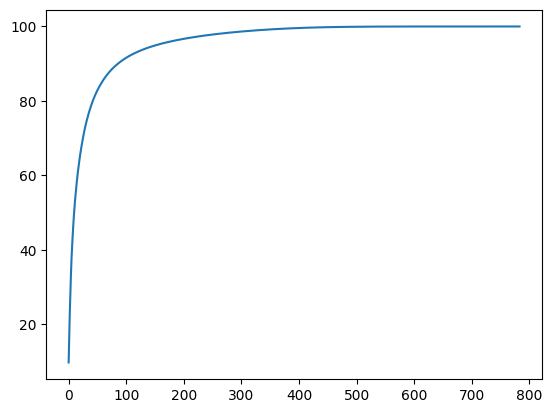

In [298]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)